Start by importing the necessary Python packages, including flowgatenist:

In [1]:
import glob #filenames and pathnames utility
import os   #operating sytem utility

import flowgatenist as flow
import flowgatenist.batch_process as batch_p #useful shorthand

import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np
#import pandas as pd

import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib inline

Check the Python version and the version the version for each of the packages needed by FlowGateNIST.<br>
    FlowGateNIST was tested with Python version 3.8.10 and the following package versions:<br>
    &emsp;numpy: 1.20.3<br>
    &emsp;matplotlib: 3.3.4<br>
    &emsp;pandas: 1.3.0<br>
    &emsp;scipy: 1.6.2<br>
    &emsp;pystan: 2.18.0.0<br>
    &emsp;seaborn: 0.11.1<br>
    &emsp;sklearn: 0.24.2<br>

In [2]:
# This cell is just used for checking verison number and can be deleted for typical data anlaysis 
import sys
print(sys.version)

3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]


In [3]:
# This cell is just used for checking verison numbers and can be deleted for typical data anlaysis 
print(f'numpy: {np.__version__}')

import matplotlib
print(f'matplotlib: {matplotlib.__version__}')

import pandas
print(f'pandas: {pandas.__version__}')

import scipy
print(f'scipy: {scipy.__version__}')

import pystan
print(f'pystan: {pystan.__version__}')

print(f'seaborn: {sns.__version__}')

import sklearn
print(f'sklearn: {sklearn.__version__}')

numpy: 1.20.3
matplotlib: 3.4.2
pandas: 1.3.1
scipy: 1.6.2
pystan: 2.19.1.1
seaborn: 0.11.1
sklearn: 0.24.2


<br>Next, set up some variables to indicate the directories where this notebook is and where the data is stored:

In [4]:
notebook_directory = os.getcwd()
notebook_directory

'C:\\Users\\djross\\Documents\\Python Scripts\\flowgatenist\\example data\\Jupyter notebooks'

The directory that contains the .fcs files (data_directory) is usually the parent directory of notebook_directory

In [5]:
data_directory = notebook_directory[:notebook_directory.rfind("\\")]
os.chdir(data_directory)
data_directory

'C:\\Users\\djross\\Documents\\Python Scripts\\flowgatenist\\example data'

<br>Then examine the acattering signal plots for the buffer blank(s) to choose which file to use for background subtration (in the example data, there is only one blank file):

In [6]:
os.chdir(data_directory)
glob.glob('*blanks*.fcs')

['PBS blanks_A3.fcs']

In [7]:
os.chdir(data_directory)
back_file = glob.glob('*blanks*.fcs')[0]
s_back = flow.io.FCSDataFrame(back_file)

<br>The automated gating functions use the foreward and side scatter channels.
<br>By default, they assume these are named 'FSC-H' and 'SSC-H. Different channel names can be used by setting the optional x_channel and y_channel arguments to the automated gating functions demonstrated below.
<br>To see a list of channel names, use 's_back.flow_frame.columns.values':

In [8]:
s_back.flow_frame.columns.values

array(['Time', 'FSC-A', 'SSC-A', 'BL1-A', 'BL2-A', 'BL3-A', 'YL4-A',
       'YL3-A', 'YL2-A', 'YL1-A', 'VL4-A', 'VL3-A', 'VL2-A', 'VL1-A',
       'FSC-H', 'SSC-H', 'BL1-H', 'BL2-H', 'BL3-H', 'YL4-H', 'YL3-H',
       'YL2-H', 'YL1-H', 'VL4-H', 'VL3-H', 'VL2-H', 'VL1-H', 'FSC-W',
       'SSC-W', 'BL1-W', 'BL2-W', 'BL3-W', 'YL4-W', 'YL3-W', 'YL2-W',
       'YL1-W', 'VL4-W', 'VL3-W', 'VL2-W', 'VL1-W'], dtype=object)

Both plots below show the same data, but the plot on the right has a log-scaled colormap

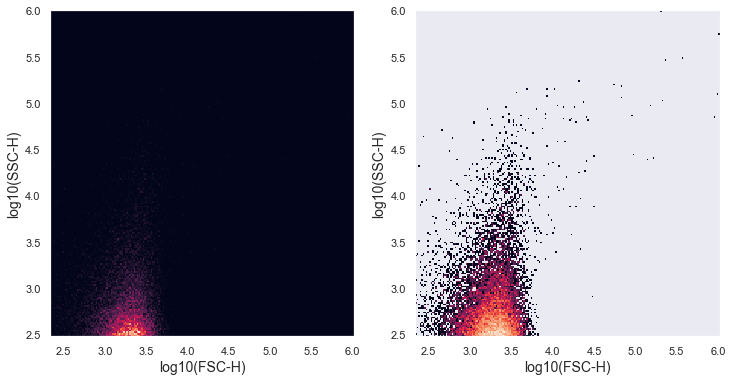

In [9]:
sns.set()
plt.rcParams["figure.figsize"] = [12, 6]
fig, axs = plt.subplots(1, 2)

s_back.flow_frame = s_back.flow_frame.loc[s_back.flow_frame['FSC-H'] > 0]
s_back.flow_frame = s_back.flow_frame.loc[s_back.flow_frame['SSC-H'] > 0]
s_back.flow_frame['log_fsc'] = np.log10(s_back.flow_frame['FSC-H'])
s_back.flow_frame['log_ssc'] = np.log10(s_back.flow_frame['SSC-H'])
x = s_back.flow_frame['log_fsc']
y = s_back.flow_frame['log_ssc']
for ax, norm in zip(axs, [None, colors.LogNorm()]):
    ax.hist2d(x, y, bins=200, norm=norm);
    ax.set_xlabel('log10(FSC-H)', size=14)
    ax.set_ylabel('log10(SSC-H)', size=14)

<br>Next, run the fcs_to_dataframe() batch process method.<br>
The only required argument is the directory containing the .fcs files (data_directory).<br>
By default, the function automatically selects the blank data file, though it can also be specified by the user (see flowgatenist documentation).

In [10]:
batch_p.fcs_to_dataframe(data_directory=data_directory)

['Cells_B1.fcs',
 'Cells_B10.fcs',
 'Cells_B11.fcs',
 'Cells_B12.fcs',
 'Cells_B2.fcs',
 'Cells_B3.fcs',
 'Cells_B4.fcs',
 'Cells_B5.fcs',
 'Cells_B6.fcs',
 'Cells_B7.fcs',
 'Cells_B8.fcs',
 'Cells_B9.fcs',
 'PBS blanks_A3.fcs',
 'Beads_H12.fcs']

<br>Next, run the automated background subtraction gating function.<br>
By default, the function automatically calculates the best values to use for the number of random initializations (back_init) and the number of clusters (num_back_clusters) for the fit to the blank data.<br>
<br>
Also, make sure the top level directory is set, either with the the optional top_directory argument or in the top_directory.txt configuration file (see flowgatenist installation instructions)

Start background_subtract_gating: 2021-08-15 18:26:15
    Cells_B1.fcs_pkl
    Cells_B10.fcs_pkl
    Cells_B11.fcs_pkl
    Cells_B12.fcs_pkl
    Cells_B2.fcs_pkl
    Cells_B3.fcs_pkl
    Cells_B4.fcs_pkl
    Cells_B5.fcs_pkl
    Cells_B6.fcs_pkl
    Cells_B7.fcs_pkl
    Cells_B8.fcs_pkl
    Cells_B9.fcs_pkl
Plotting background 2D histogram, 2021-08-15 18:26:15
Automated calculation of num_back_clusters... 2021-08-15 18:26:19
                   ... num_back_clusters = 8, 2021-08-15 18:27:03
Automated calculation of back_init... 2021-08-15 18:27:03
                 ... back_init = 200, 2021-08-15 18:27:32
Running back_fit gmm... 2021-08-15 18:27:32
    Running full back_fit gmm... 2021-08-15 18:27:32
              ... done, 2021-08-15 18:28:28
Plotting gmm fit to background data, 2021-08-15 18:28:28
Loading E. coli data files, 2021-08-15 18:28:28
Plotting 2D histograms for scattering data from each file, 2021-08-15 18:28:30
Running sub-sampled scatter_cell_fit gmms... 2021-08-15 18:28:31

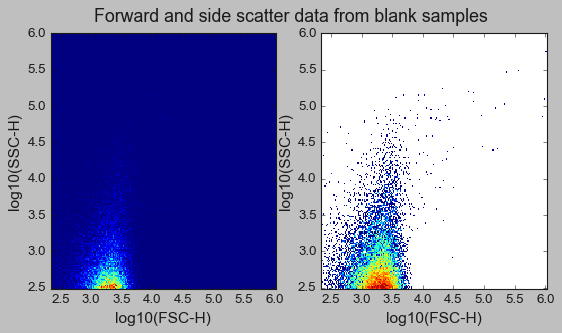

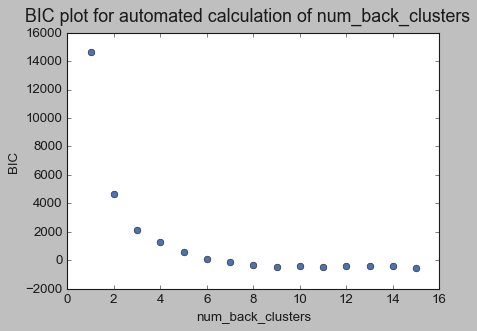

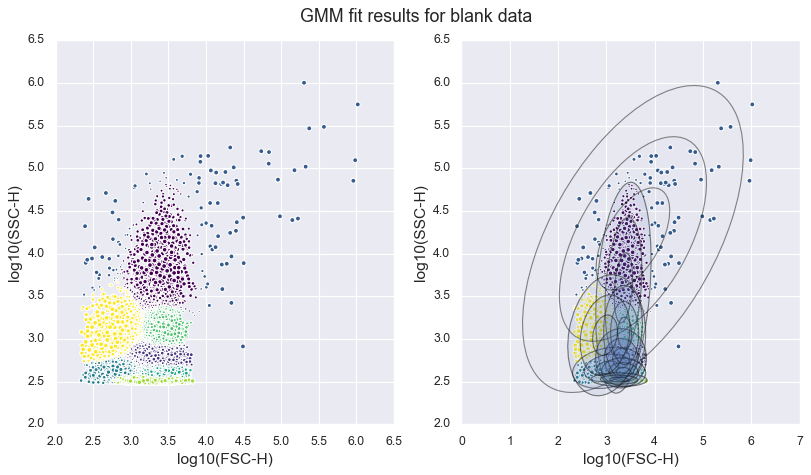

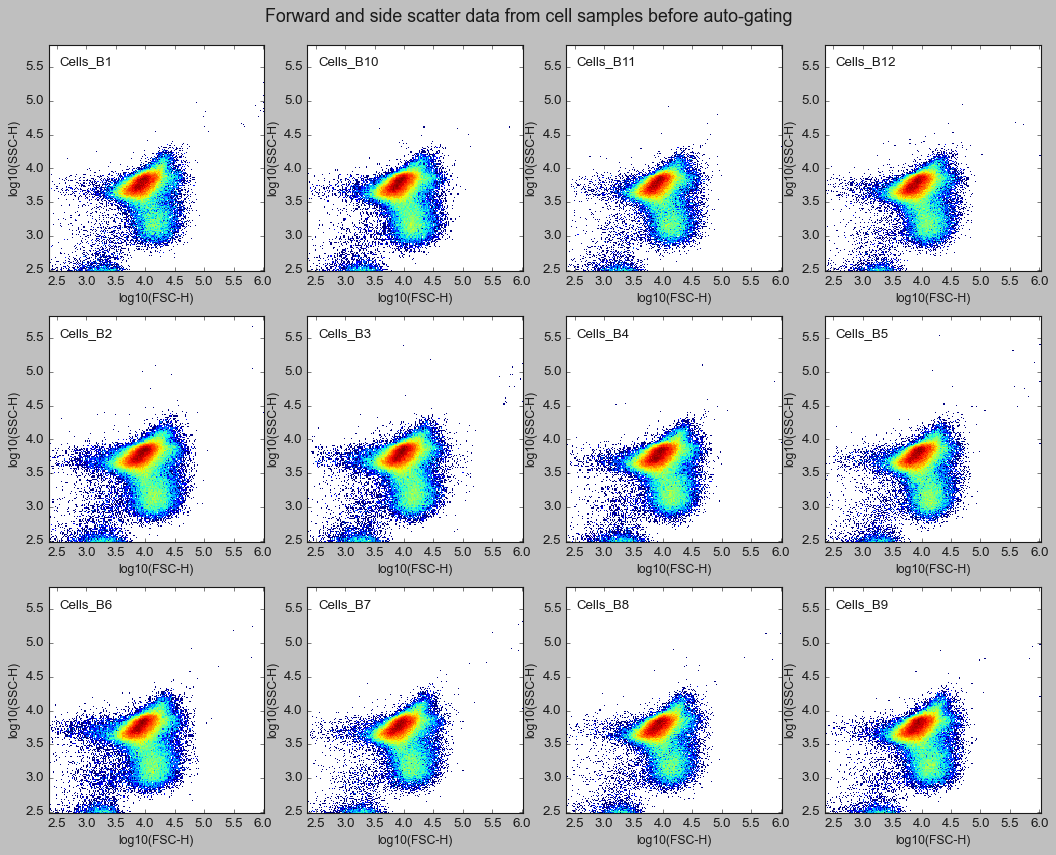

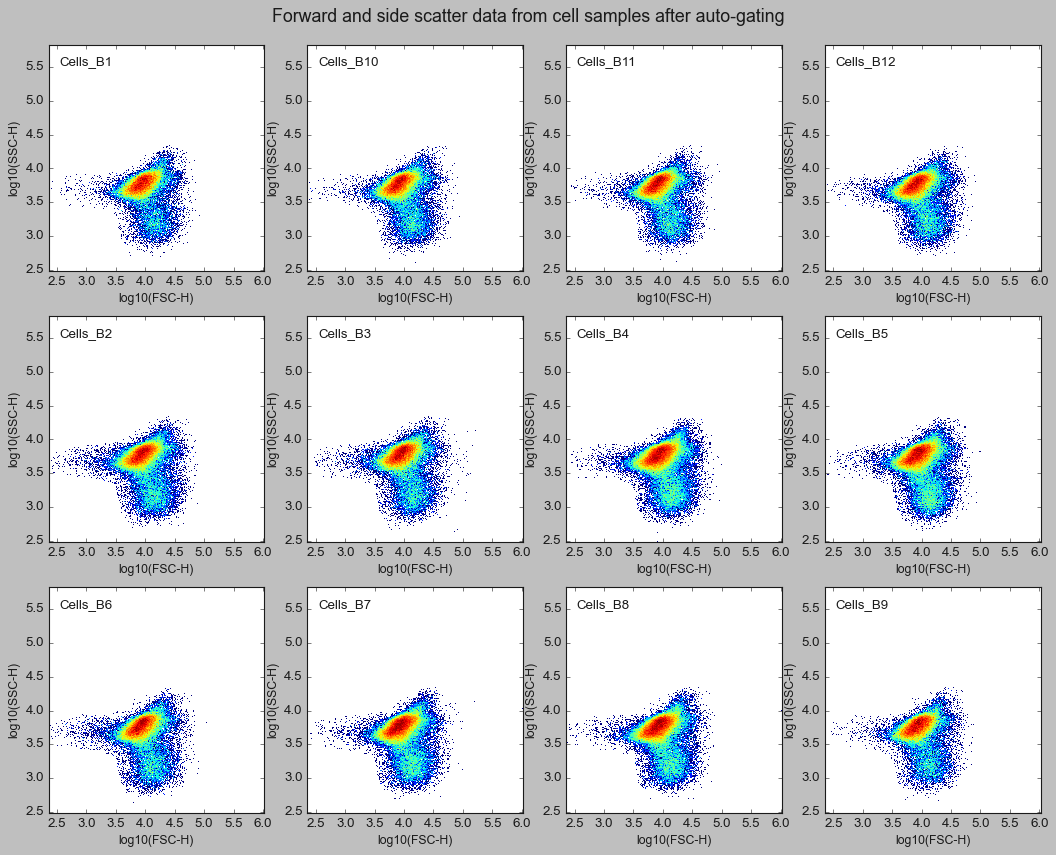

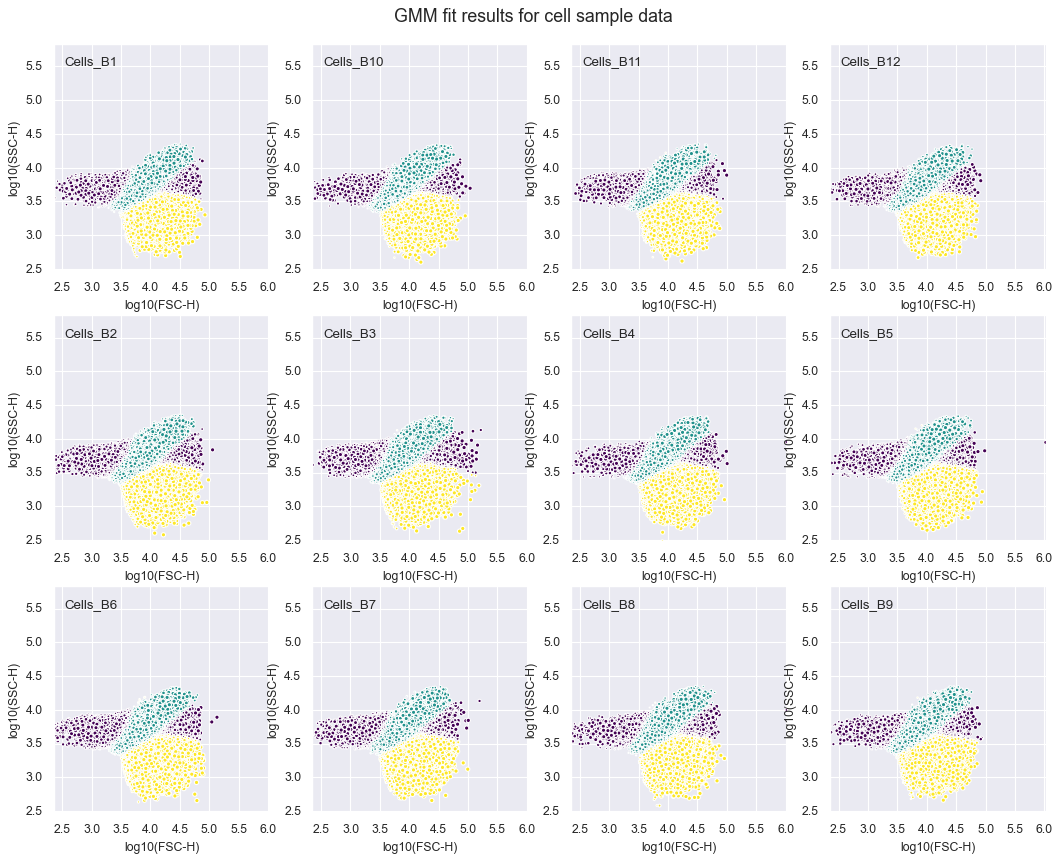

In [11]:
%%time
batch_p.background_subtract_gating(data_directory=data_directory,
                                   top_directory='Documents',
                                   num_cell_clusters=3)

The background_subtract_gating() function generates several diagnostic plots, which you should examine to verify that automated gating was sucessful.<br>
<br>
The top plots (Forward and side scatter data from blank samples) show 2D histograms of the blank data (similar to the plots above).<br>

The next plot (BIC plot for automated calculation of num_back_clusters), which is only shown if num_back_clusters is not set, shows the Bayesian information criterion (BIC) vs. num_back_clusters. The algorithm for automatically choosing num_back_clusters, finds the lowest value of num_back_clusters that gives a BIC close to the minimum.<br>

The next pair of plots (GMM fit results for blank data) shows the GMM fit results for the blank data. The left-hand plot is a plot of the forward scatter vs. side scatter signals with the points colored based on the GMM cluster assignments. The right-hand plot is the same, but with ellipses plotted on top of the data to show the Gaussian mixture components, with contour lines indicating 1, 2, and 3 standard deviations.<br>

The next set of plots (Forward and side scatter data from cell samples before auto-gating) shows 2D histograms of the forward scatter vs. side scatter signals for each of the cell samples before automatic gating.<br>

The next set of plots (Forward and side scatter data from cell samples after auto-gating) shows 2D histograms of the forward scatter vs. side scatter signals for each of the cell samples after automatic gating.<br>

The final set of plots (GMM fit results for cell sample data) shows forward scatter vs. side scatter signals for each of the cell samples after automatic gating, with the points colored based on the GMM cluster assignments.<br>

With the default setting for num_back_clusters and back_init, the background_subtract_gating() function runs the GMM fit to the blank data multiple times to detirmine the best vlaues for those arguments.<br>
Once the best values are detirmined, you can shorted the analysis time by specifying them manually with the optional arguments:

Start background_subtract_gating: 2021-08-15 18:29:52
    Cells_B1.fcs_pkl
    Cells_B10.fcs_pkl
    Cells_B11.fcs_pkl
    Cells_B12.fcs_pkl
    Cells_B2.fcs_pkl
    Cells_B3.fcs_pkl
    Cells_B4.fcs_pkl
    Cells_B5.fcs_pkl
    Cells_B6.fcs_pkl
    Cells_B7.fcs_pkl
    Cells_B8.fcs_pkl
    Cells_B9.fcs_pkl
Plotting background 2D histogram, 2021-08-15 18:29:52
Running back_fit gmm... 2021-08-15 18:29:57
    Running full back_fit gmm... 2021-08-15 18:29:57
              ... done, 2021-08-15 18:30:21
Plotting gmm fit to background data, 2021-08-15 18:30:21
Loading E. coli data files, 2021-08-15 18:30:22
Plotting 2D histograms for scattering data from each file, 2021-08-15 18:30:23
Running sub-sampled scatter_cell_fit gmms... 2021-08-15 18:30:24
Running final scatter_cell_fit gmm... 2021-08-15 18:30:47
Running 1 gmm fits initialized from memory... 2021-08-15 18:30:55
    using best gmm from memory to initialize, scatter_cell_fit.2020-02-13.pkl
                      ... done, 2021-08-15 18

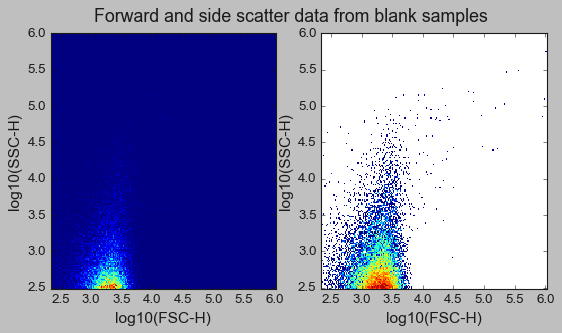

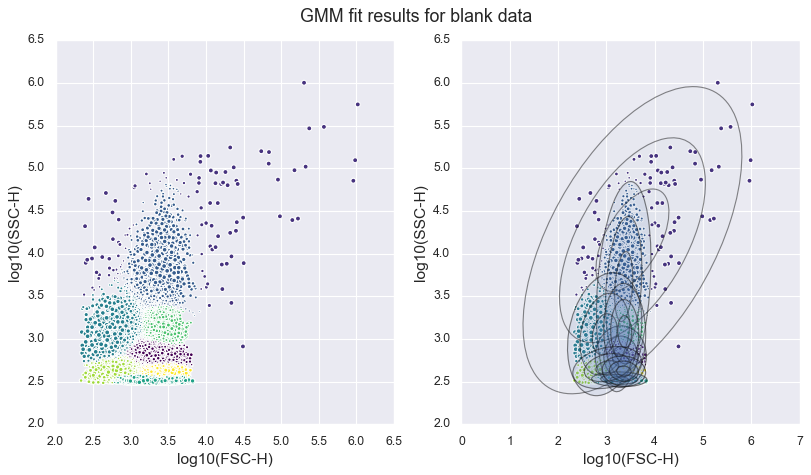

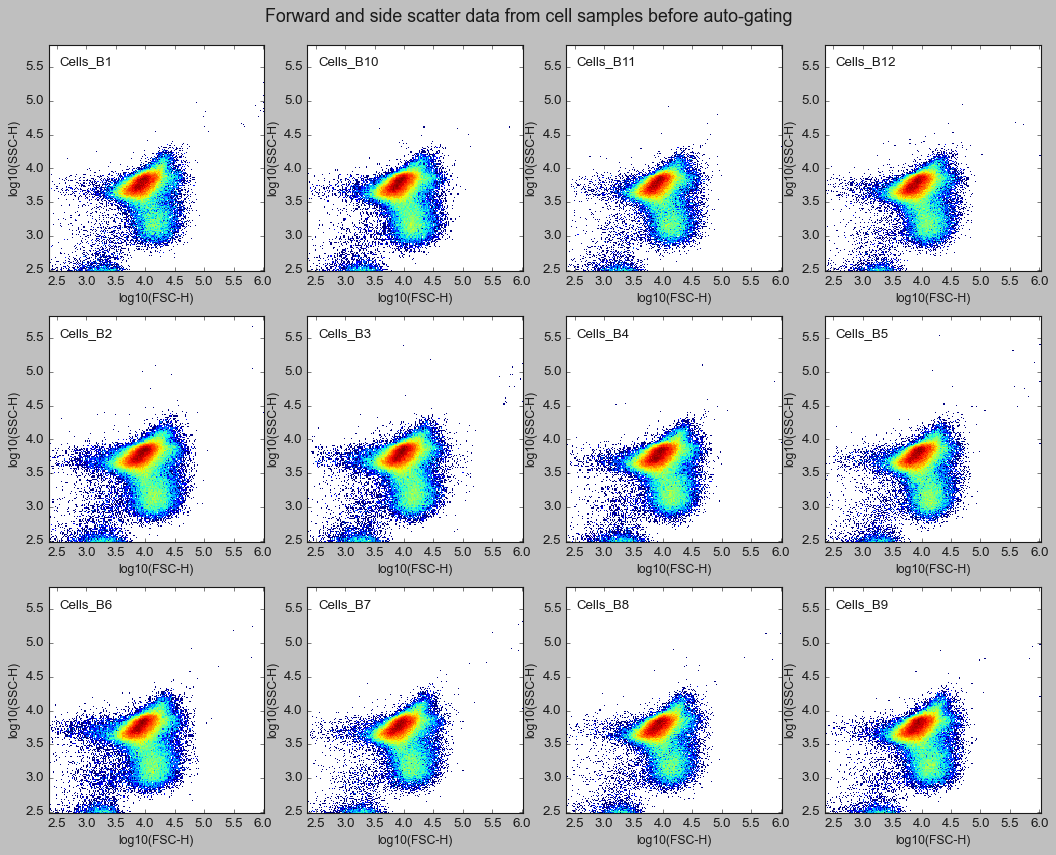

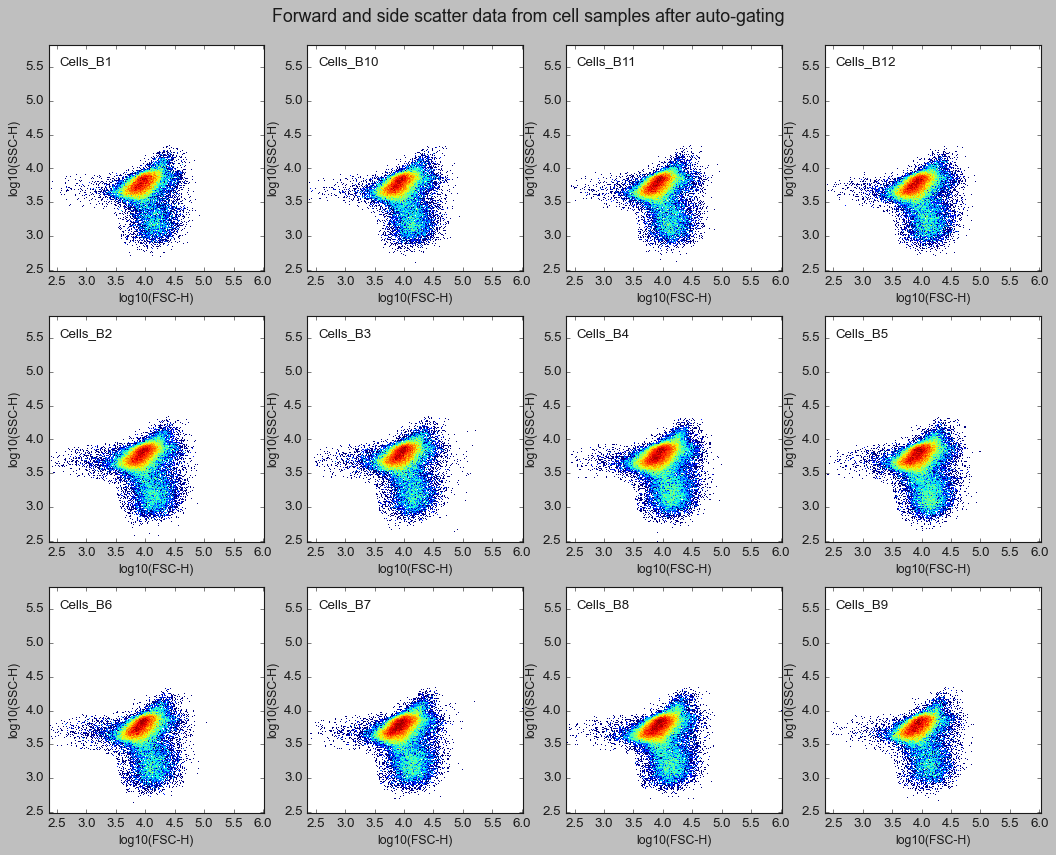

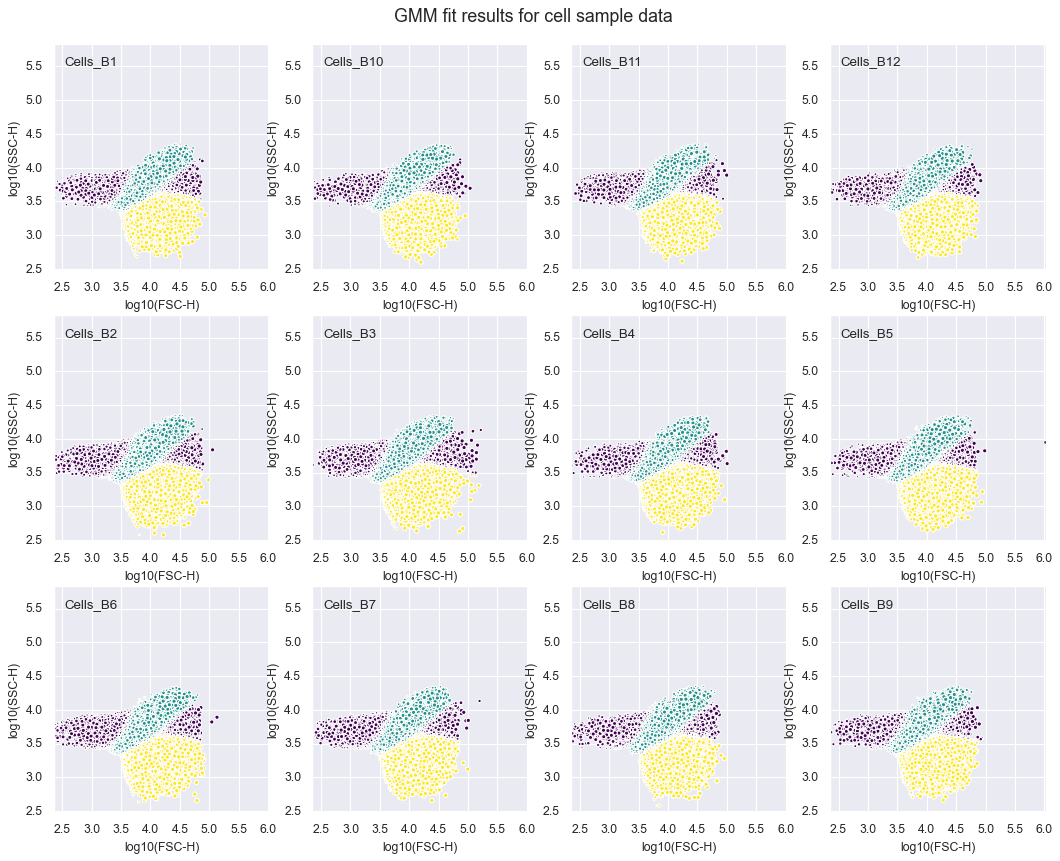

In [12]:
%%time
batch_p.background_subtract_gating(data_directory=data_directory,
                                   top_directory='Documents',
                                   num_cell_clusters=3,
                                   num_back_clusters=8,
                                   back_init=100)

<br><br>The optional trim_alpha argument can also be used to discard additional outliers from the cell clusters. It is a parameter between zero and one that indicates the central fraction of the Gaussian probability distribution for each cell cluster to include in the output. For example, compare the results from the last cell (trim_alpha=None, no additional cluster trimming) to the results for the next cell (trim_alpha=0.90, discards events outside the central 90% region of the Gaussian probability distribution for each cell cluster):

Start background_subtract_gating: 2021-08-15 18:31:46
    Cells_B1.fcs_pkl
    Cells_B10.fcs_pkl
    Cells_B11.fcs_pkl
    Cells_B12.fcs_pkl
    Cells_B2.fcs_pkl
    Cells_B3.fcs_pkl
    Cells_B4.fcs_pkl
    Cells_B5.fcs_pkl
    Cells_B6.fcs_pkl
    Cells_B7.fcs_pkl
    Cells_B8.fcs_pkl
    Cells_B9.fcs_pkl
Plotting background 2D histogram, 2021-08-15 18:31:46
Running back_fit gmm... 2021-08-15 18:31:51
    Running full back_fit gmm... 2021-08-15 18:31:51
              ... done, 2021-08-15 18:32:17
Plotting gmm fit to background data, 2021-08-15 18:32:17
Loading E. coli data files, 2021-08-15 18:32:18
Plotting 2D histograms for scattering data from each file, 2021-08-15 18:32:19
Running sub-sampled scatter_cell_fit gmms... 2021-08-15 18:32:21
Running final scatter_cell_fit gmm... 2021-08-15 18:32:48
Running 1 gmm fits initialized from memory... 2021-08-15 18:32:57
    using best gmm from memory to initialize, scatter_cell_fit.2020-02-13.pkl
                      ... done, 2021-08-15 18

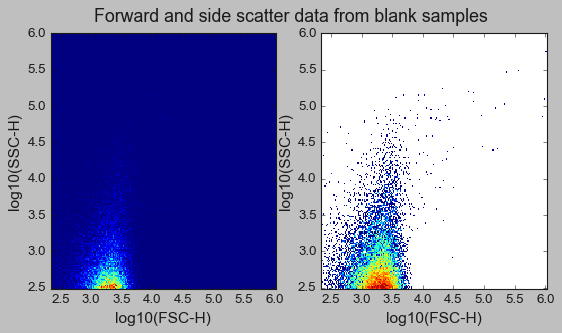

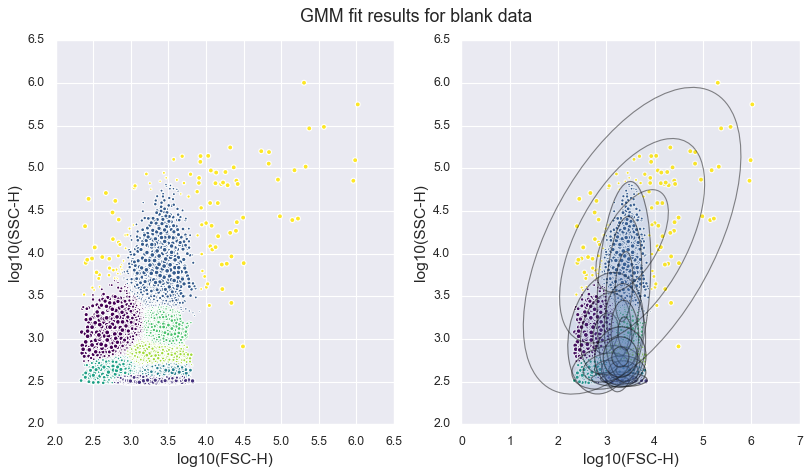

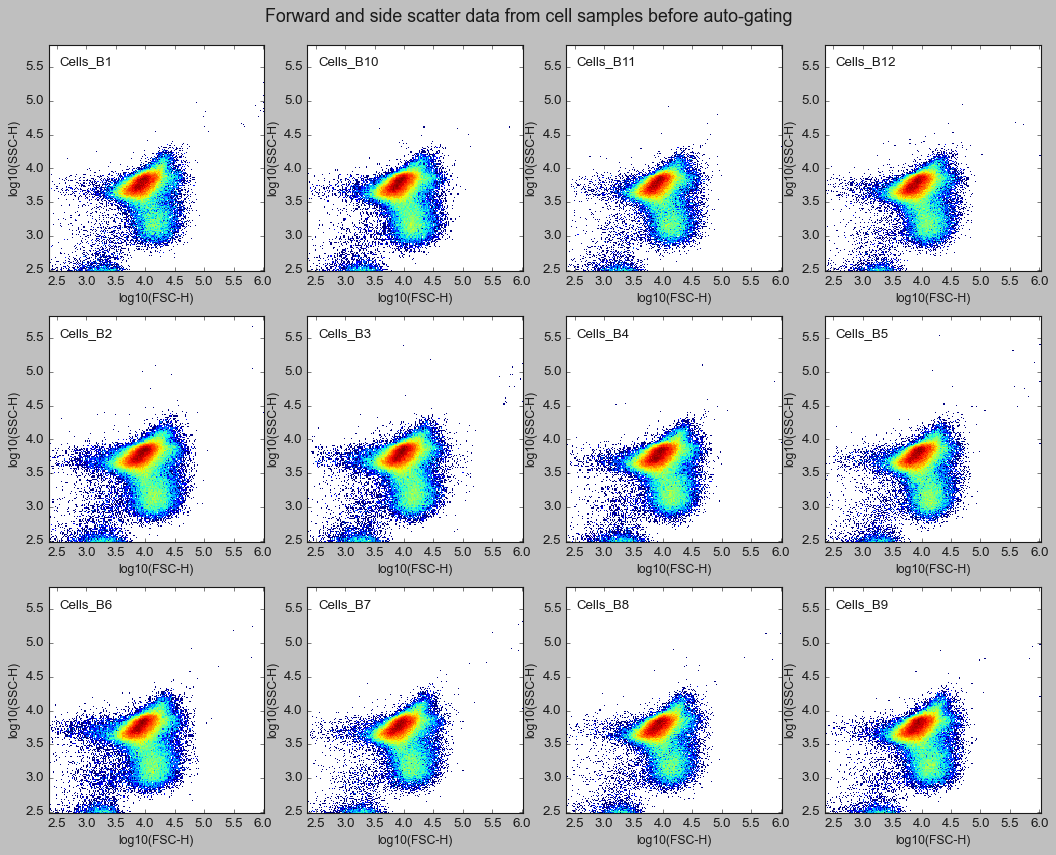

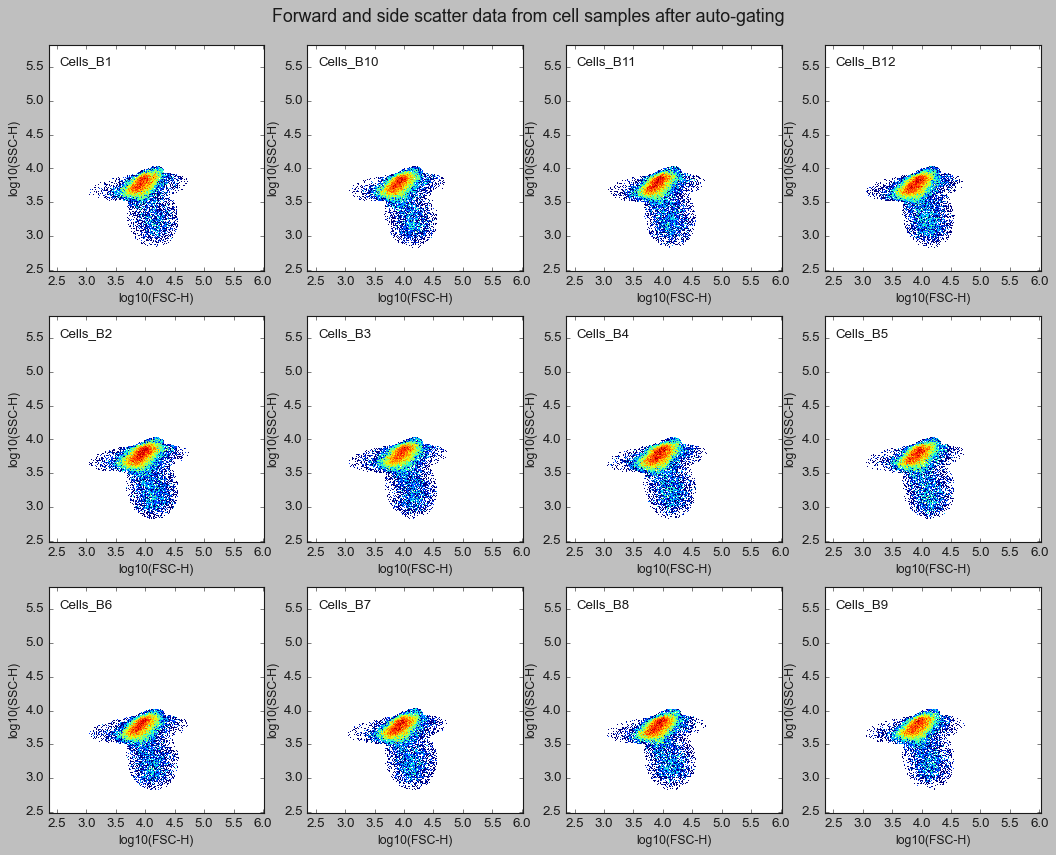

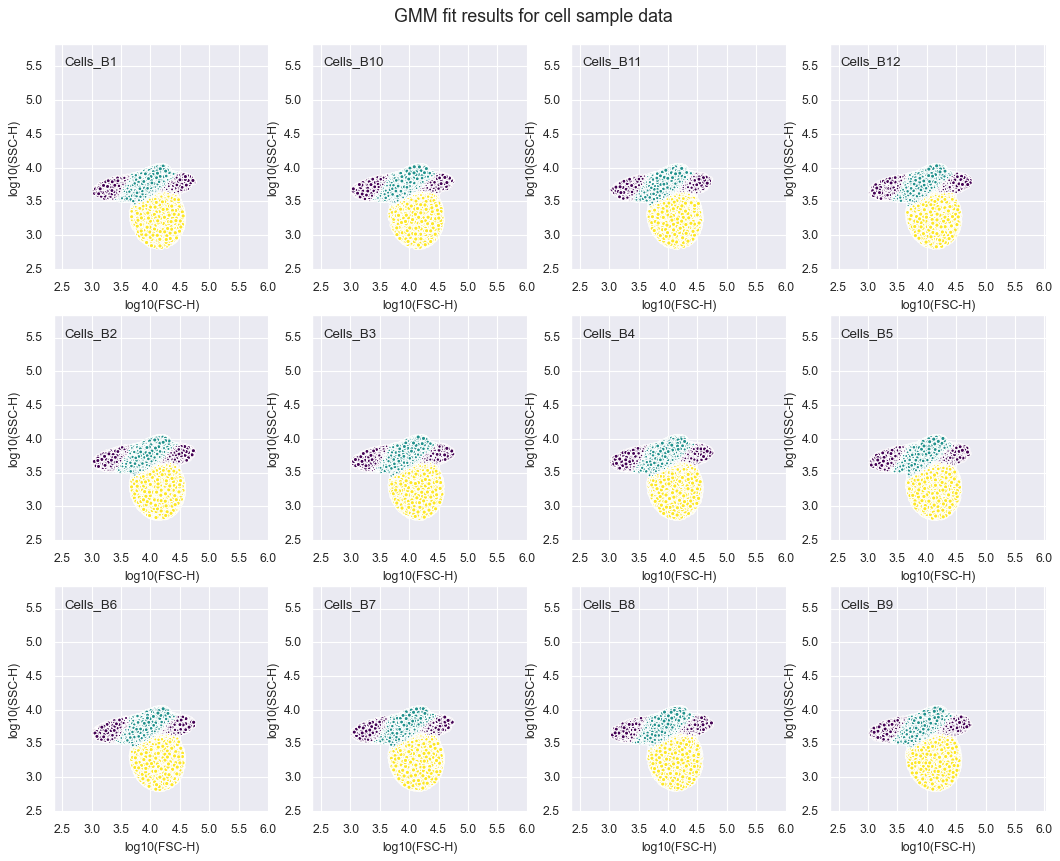

In [13]:
%%time
batch_p.background_subtract_gating(data_directory=data_directory,
                                   top_directory='Documents',
                                   num_cell_clusters=3,
                                   num_back_clusters=8,
                                   back_init=100,
                                   trim_alpha=0.90)

<br><br>Review the plots created by the background_subtract_gating() function, to verify that cell gating was sucessful. These plots are also saved as a pdf file, "cell vs. background gating plots.pdf", to provide an additional record of the analysis.
<br><br>When you are satisfied with the background subtraction gating results, the next step is to run the automated singlet gating function.<br>
Normally, only one of the two singlet gating funtions would be used (we typically use singlet_gating() for <i>E. coli</i> data analysis). In this notebook, for demonstration, we show both singlet gating functions, starting with singlet_gating_width():

Starting singlet_fit gmm... 2021-08-15 18:33:54
    Cells_B1.fcs_pkl
    Cells_B10.fcs_pkl
    Cells_B11.fcs_pkl
    Cells_B12.fcs_pkl
    Cells_B2.fcs_pkl
    Cells_B3.fcs_pkl
    Cells_B4.fcs_pkl
    Cells_B5.fcs_pkl
    Cells_B6.fcs_pkl
    Cells_B7.fcs_pkl
    Cells_B8.fcs_pkl
    Cells_B9.fcs_pkl
    PBS blanks_A3.fcs_pkl
Loading E. coli_width data files, 2021-08-15 18:33:54


C:\Users\djross\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\djross\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Running sub-sampled randomly initialized singlet_fit gmms... 2021-08-15 18:33:55
Running final randomly initialized singlet_fit gmm... 2021-08-15 18:34:04
Running 2 gmm fits initialized from memory... 2021-08-15 18:34:08
    using best gmm from memory to initialize, singlet_fit.2020-02-13.1.pkl
                 ... done, 2021-08-15 18:34:24
Plotting singlet_fit results, 2021-08-15 18:34:24
Applying singlet gate, 2021-08-15 18:34:25


C:\Users\djross\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Plotting scatter plots showing singlets, 2021-08-15 18:34:30
Done. 2021-08-15 18:34:34


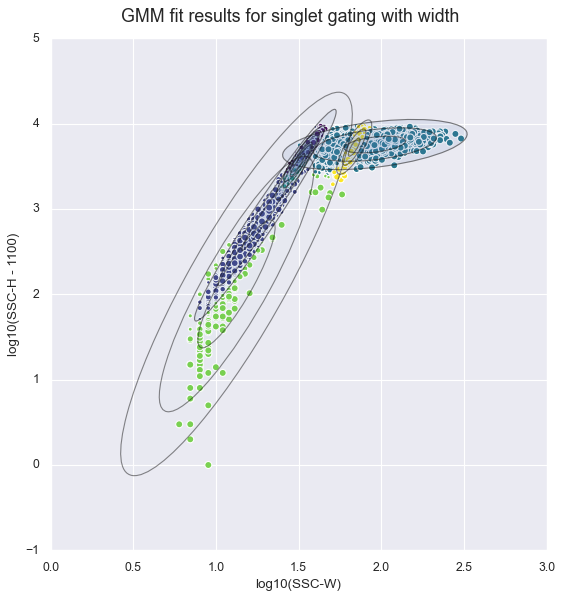

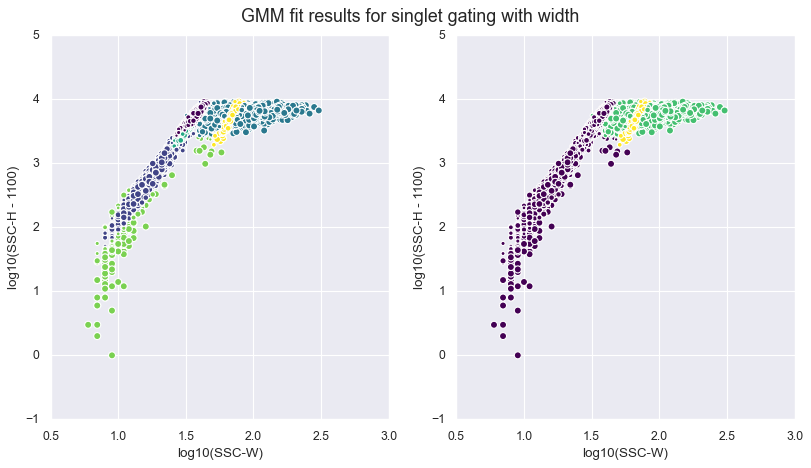

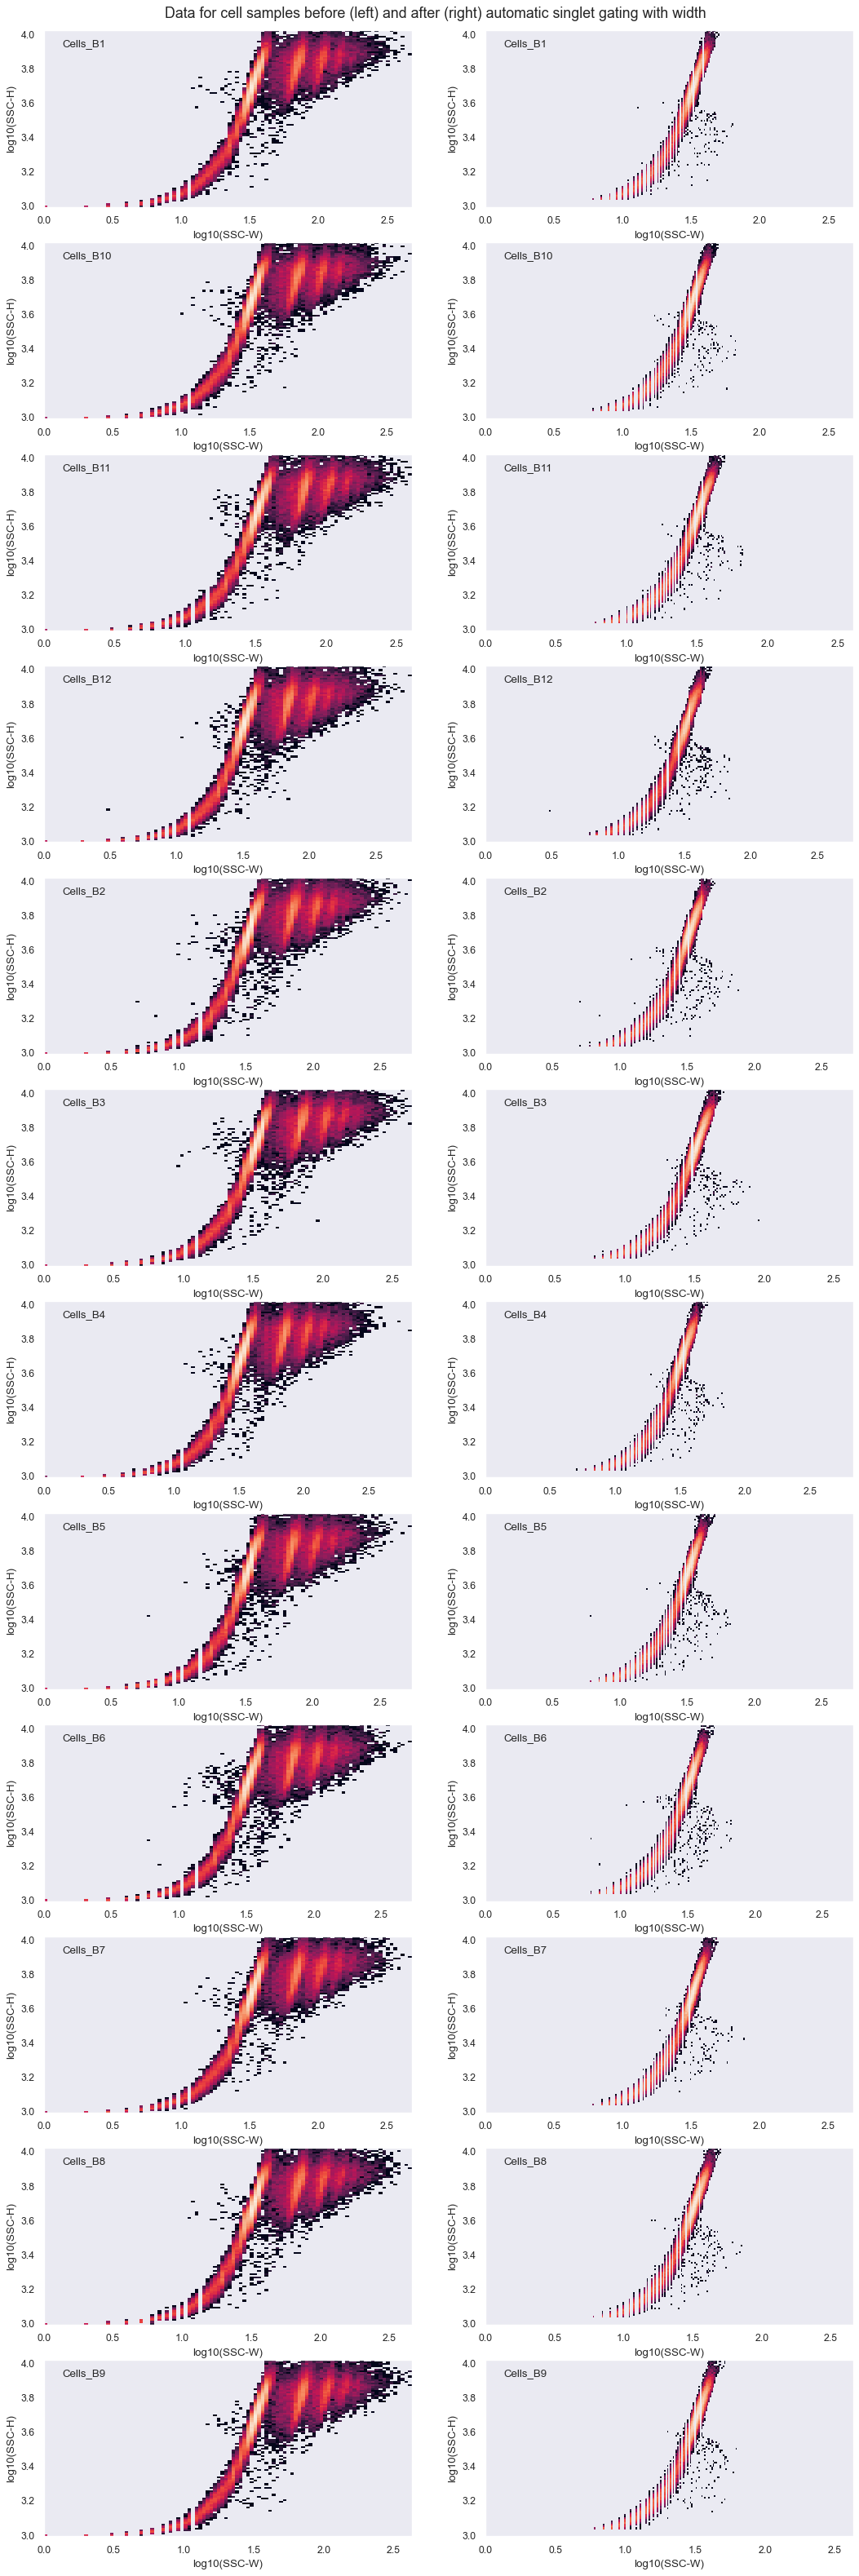

In [14]:
batch_p.singlet_gating_width(data_directory=data_directory,
                             top_directory='Documents',
                             singlet_clusters=6,
                             ssc_adjustment=1100,
                             cell_type='E. coli_width',
                             singlet_width_cutoff=1.6,
                             doublet_width_cutoff=1.7)

The singlet_gating_width() function generates several diagnostic plots, which you should examine to verify that automated singlet gating was sucessful.<br>
<br>
The top plot (GMM fit results for singlet gating with width) shows the GMM fit results, with data points colored by their cluster assignment and ellipses plotted to show the 1, 2, and 3 standard deviation contours for each cluster. <br>
The y-axis value in the plot is the base-ten logarithm of the side-scatter height minus the ssc_adjustment parameter. This adjustment is used to make the singlet cluster more linear in the plot so that it can be fit with fewer Gaussian clusters.

The next two plots (GMM fit results for singlet gating with width) show similar results without the ellipses. In the lhe left-hand plot, the data point colors indicate the GMM cluster assingments. In the right-hand plot, the data point colors show the results of the automatic singlet gating: singlet events are shown with purple points, and non-singlet events are shown with different shades of yellow, green, or blue.<br>

The last set of plots (Data for cell samples before (left) and before (right) automatic singlet gating with width) shows 2D histograms of the side scatter height vs. side scatter width signals for each of the cell samples. The left-hand plots show all cell events. The right-hand plots onmly show singlet events.<br>

Starting singlet_fit gmm... 2021-08-15 18:34:37
    Cells_B1.fcs_pkl
    Cells_B10.fcs_pkl
    Cells_B11.fcs_pkl
    Cells_B12.fcs_pkl
    Cells_B2.fcs_pkl
    Cells_B3.fcs_pkl
    Cells_B4.fcs_pkl
    Cells_B5.fcs_pkl
    Cells_B6.fcs_pkl
    Cells_B7.fcs_pkl
    Cells_B8.fcs_pkl
    Cells_B9.fcs_pkl
    PBS blanks_A3.fcs_pkl
Loading E. coli data files, 2021-08-15 18:34:37
Running sub-sampled randomly initialized singlet_fit gmms... 2021-08-15 18:34:38
Running final randomly initialized singlet_fit gmm... 2021-08-15 18:34:57
Running 1 gmm fits initialized from memory... 2021-08-15 18:35:01
    using best gmm from memory to initialize, singlet_fit.2020-02-13.pkl
                 ... done, 2021-08-15 18:35:05
Plotting singlet_fit results, 2021-08-15 18:35:05
Applying singlet gate, 2021-08-15 18:35:07
Plotting scatter plots showing singlets, 2021-08-15 18:35:12
Done. 2021-08-15 18:35:16


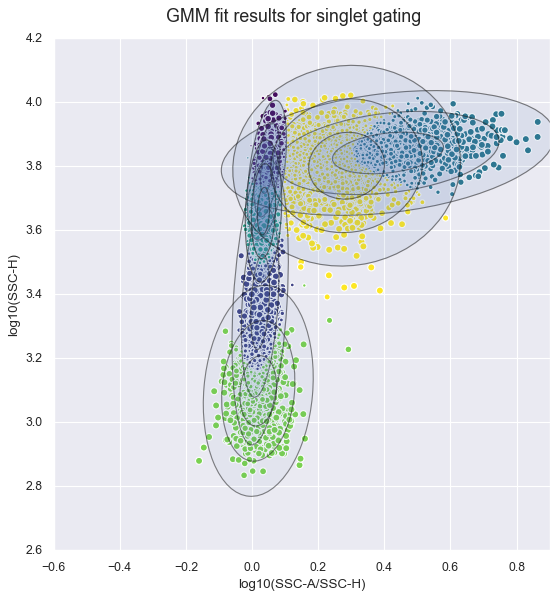

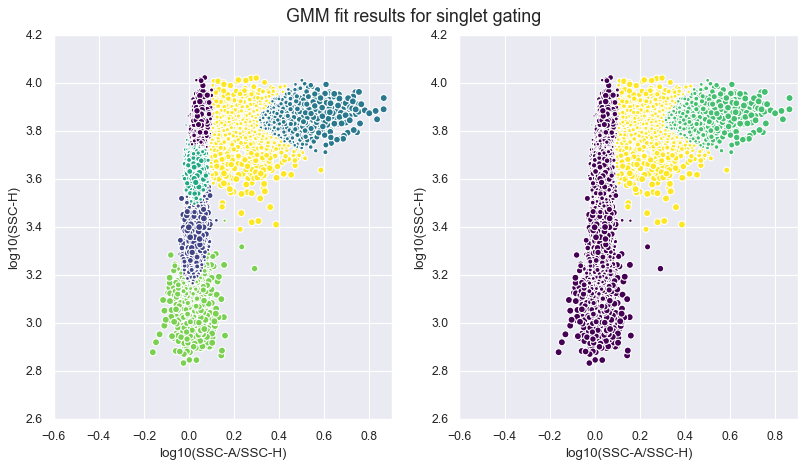

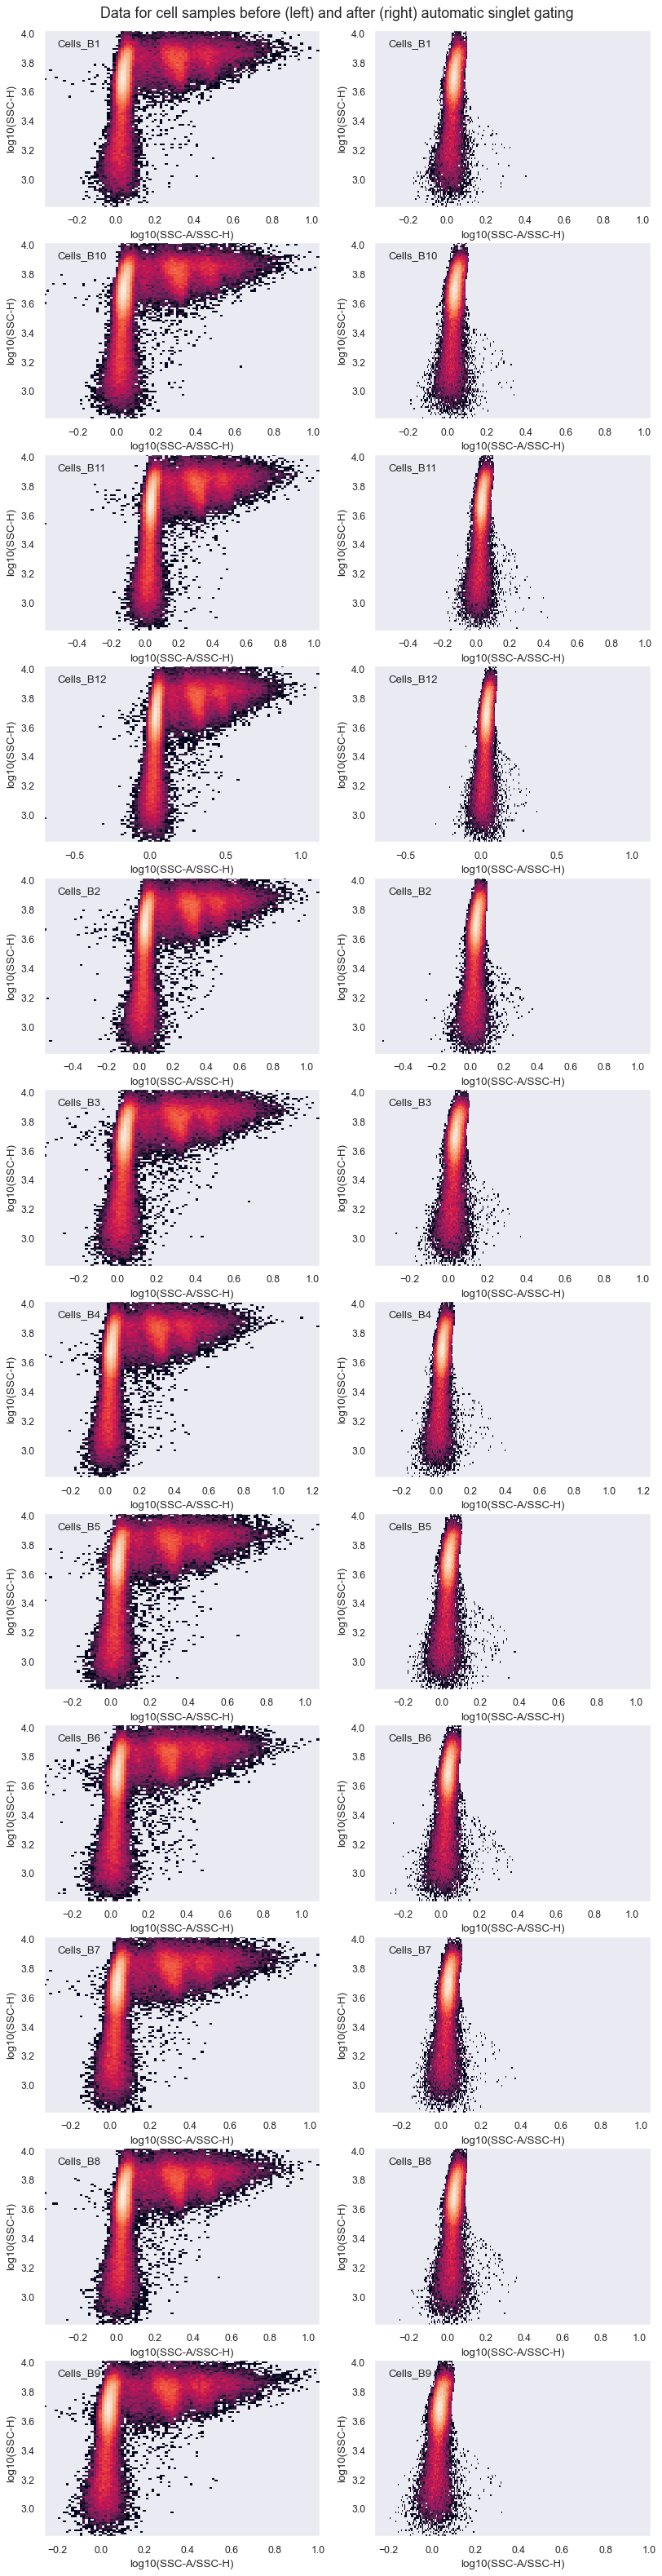

In [15]:
batch_p.singlet_gating(data_directory=data_directory,
                       top_directory='Documents')

The singlet_gating() function generates a similar set of diagnostic plots.<br>
<br>
The top plot (GMM fit results for singlet gating) shows the GMM fit results, with data points colored by their cluster assignment and ellipses plotted to show the 1, 2, and 3 standard deviation contours for each cluster. <br>

The next two plots (GMM fit results for singlet gating) show similar results without the ellipses. In the lhe left-hand plot, the data point colors indicate the GMM cluster assingments. In the right-hand plot, the data point colors show the results of the automatic singlet gating: singlet events are shown with purple points, and non-singlet events are shown with different shades of yellow, green, or blue.<br>

The last set of plots (Data for cell samples before (left) and before (right) automatic singlet gating) shows 2D histograms of the forward scatter height vs. the ratio of forward scatter area to height signals for each of the cell samples. The left-hand plots show all cell events. The right-hand plots onmly show singlet events.<br>

<br>
The next step in automated flow cytometry data analysis is fluorescence calibration with fluorescent beads. Relevant methods are demonstrated in the Jupyter notebook: "Notebook 2.Calibration with fluorescent beads.ipynb".